# Assignment 2 - Due Monday February 26th, at 11:59pm

Your completed assignment should be saved in your Bitbucket mp248 repository in the file **Assignment.2/Assignment.2.ipynb**.   

**Do your work in a copy of this i-python notebook.**

**Ensure you label your code blocks** eg: (1)(a), (2)(b), (2)(b)continued, etc.

Please ensure you do not have a copy of the course repository inside your personal mp248 Bitbucket repository. This assignment uses many csv files (from the course repository).  **Do not include** these with your homework, and do not store them on your mp248 repository.  The issue here is that if you store large files in your mp248 repository it slows down the grading script substantially and makes it more difficult for us to give you timely feedback before the due date. In your code, just point to the location (outside of your personal repository) when you need them.


## Problem 1

Recall Newton's method for finding the roots of $z^3-1$.  The iterator is

$$N(z) = z-\frac{f(z)}{f'(z)} = z - \frac{z^3-1}{3z^2} = \frac{2z^2+1}{3z^2}$$

In this problem we ask you to use Sympy to find:

 (a) The points in the plane where Newton's method fails after 2 or 3 iterations. Notice that $N(z) = \frac{2z^2+1}{3z^2}$ which is well-defined as long as $z \neq 0$.  Thus Newton's method fails on one iteration only for $z=0$. Find both closed-form expressions for your answers as well as floating-point approximations. Print the approximations in your notebook. Use the Python casting technique **complex(z)** to convert the Sympy complex number **z** to a floating point approximation. In your notebook also count the number of points, i.e. write "The number of points where Newton's method fails after exactly two iterations is . . ."
 
 (b) The points in the plane where Newton's method is periodic of period 2 or 3.  A point is periodic of period 1 means $N(z) = z$.  Periodic of period 2 means $N(N(z))=z$ and $N(z) \neq z$.  Periodic of period 3 means $N(N(N(z))) = z$ while $N(z) \neq z$ and $N(N(z))\neq z$. 
 
 So for example, the points of period $1$ are the solution to the equation
 $$z = N(z) = z - \frac{z^3-1}{3z^2}$$
 which we can see are the roots of the original equation $z^3-1$. Similarly write-out the number of periodic points of period exactly 2, similarly for period 3.
 
 (c) Make a basins of attraction plot (feel free to use your code from the corresponding lab) for Newton's method for the polynomial $z^3-1$, using the colours red, green and blue.  Add to your plot the points where Newton's method eventually fails (part (a)) in 1, 2 or 3 iterations. Use yellow for these points.  Also add the periodic points of period 1, 2 and 3, using white for these points. Use a scatter plot so you can set the size of the points. Make points where Newton's method eventually fails smaller if it takes more iterations for them to fail, similarly make periodic points of larger period smaller in your plot. Ensure your image has a resolution of 800x800. Use **%matplotlib inline** to ensure your images save to your notebook. 


In [81]:
## Problem 1
import sympy as sp
import numpy as np

f = sp.Function('f')
x = sp.Symbol('x')
N = x - f(x)/f(x).diff(x)

Nsq = sp.simplify(N.subs(f(x), x**3 - 1).doit())
sp.pprint(Nsq)


IT = sp.lambdify(x, Nsq)
xi = 3.0
print("\n")
for i in range(10):
    print("Iterate", i, "=", xi)
    xi = IT(xi)
print("PART 2")
xi = sp.cbrt(-1/2)
#print(np.cbrt(-1/2))
      
for j in range(10):
    print("Iterate", j, "=", xi)
    xi = IT(xi)

    
    
    
    
    
    
    
    
    
## f = sympy fct x
## z = sympy initiallized variable name
## roots == list of roots

def basinplot(f,z,roots,rootcol,RMIN,RMAX,IMIN,IMAX,xres,yres):
    N = z - f/f.diff(z)
    DF = sp.lambdify(z,f.diff(z),"mpmath")
    IT = sp.lambdify(z,N,"mpmath")
    ##setup image array 
    IM= np.ndarray(shape=(yres,xres,3),dtype = float)
    for i in range(yres):
        z0 = (i/xres)*(RMAX-RMIN)+RMIN + ((j/yres)*(IMAX-IMIN)+IMIN*1j)
        z1 = z0
        DEV = 1.0 ## track distance from root
        while DEV > 0.1:
            if abs(DF(z0))<0.0001:
                DEV = 0.0
                #stop iterating if derovatove is too close to zero
            else:
                z1 = IT(z0)
                DEV = abs(z1-z0)
                z0 = z1
                #keep iterating until successive iterations are <0.1 apart
        rootFound = False
        for k in range(len(roots)):
            if abs(roots[k]-z0)<0.2:
                rootFound =True
                IM[j,i] = rootcol[k]
                #if z is within 0.2 of a root colour appropriately
        if rootFound == False:
            IM[j,i] = np.array([0.0,0.0,0.0])
            #if z is not close enough to a root colour white
    plt.close()
    plt.imshow(IM,extent=[RMIN,RMAX,IMIN,IMAX])
    plt.show()

roots = sp.solve(x**3 -1)
sp.pprint(roots)
basinplot(x**3-1,x,[r.evalf() for  r in roots],np.array([1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0]),-2.0,2.0,-2.0,2.0,240,240)


   3    
2⋅x  + 1
────────
     2  
  3⋅x   


Iterate 0 = 3.0
Iterate 1 = 2.037037037037037
Iterate 2 = 1.4383552698704214
Iterate 3 = 1.120022383336509
Iterate 4 = 1.0124022603818694
Iterate 5 = 1.0001513113605829
Iterate 6 = 1.0000000228905095
Iterate 7 = 1.0000000000000007
Iterate 8 = 1.0
Iterate 9 = 1.0
PART 2
Iterate 0 = 0.7937005259841*(-1)**(1/3)
Iterate 1 = 1.17491279813953e-16*(-1)**(1/3)
Iterate 2 = -2.41472387559649e+31*(-1)**(1/3)
Iterate 3 = -1.60981591706433e+31*(-1)**(1/3)
Iterate 4 = -1.07321061137622e+31*(-1)**(1/3)
Iterate 5 = -7.1547374091748e+30*(-1)**(1/3)
Iterate 6 = -4.76982493944986e+30*(-1)**(1/3)
Iterate 7 = -3.17988329296658e+30*(-1)**(1/3)
Iterate 8 = -2.11992219531105e+30*(-1)**(1/3)
Iterate 9 = -1.4132814635407e+30*(-1)**(1/3)
⎡     1   √3⋅ⅈ    1   √3⋅ⅈ⎤
⎢1, - ─ - ────, - ─ + ────⎥
⎣     2    2      2    2  ⎦


ValueError: only 2 non-keyword arguments accepted

## Problem 2

In this problem we ask to you extend the code from **Part.II/Data.1.filled.ipynb**. As in class, load and parse the files in the **w.sask** and **w.vic** subdirectories to create the variable **mList**.  For this problem use the data from **mList**.

(a) Make a plot of daily precipitation, comparing two cities.  Make the plot for Saskatoon vs. Victoria.  On the x-axis you will have the daily precipitation for Victoria.  On the y-axis you will have the daily precipitation for Saskatoon.  Only plot dates where (in mList) we have precipitation data for both cities.  In particular, once you have combed through the data to find the precipitation data for the common dates, print a line in your python notebook of the form "Common data: n" where n is the number of days where we have precipitation data for both Victoria and Saskatoon.  

(b) Make a similar daily plot of mean temperatures of Victoria vs. Saskatoon.  Include the linear least squares interpolation in your plot. 

In [82]:
## Problem 2
## Let's start by loading all the weather data, storing it in a list of dictionaries. An element of 
## this list will consist of the weather file headers, turned into a dict-object.  

## There will also be an additional weather-table key that will contain a list of dict objects. 
## containing the data the from a line of the file. 

import datetime as dt
import os as os
import fnmatch as fn
from operator import itemgetter

wsubdir = fn.filter(os.listdir('.'), "w.*")
print("Weather subdirectories:", wsubdir)

## each file is of the form "key", "data" for several lines, then a blank space
## "Legend" then several (ignorable) lines, then a blank space
## "keys" separated by commas then
## remaining lines are the key values for each measurement. 

masterList = [] ## list of weather station dict objects

for wd in wsubdir:
    files = fn.filter(os.listdir(wd), "eng-daily*.csv")
    for wdf in files:
        with open('./'+wd+'/'+wdf, encoding="UTF-8") as f:
            blanks=0
            content = f.readlines()
            FD = dict() ## file dict head.
            FL = [] ## file list.
            keys = []
            for LN in content:
                PL = LN.replace(u'\ufeff','').split(",")
                for i in range(len(PL)): # this removes the quotes around the numbers.
                    PL[i] = PL[i].translate({ord(c): None for c in '"\n'})
                if len(PL)==1 and PL[0]=='':
                    blanks+=1
                    if blanks==2 and PL[0]=='':
                        continue
                ## if blanks==0 we need to build the main dict
                ## if blanks==1 we ignore
                ## if blanks==2 we build the data.
                if blanks==0:
                    FD[PL[0]] = PL[1]
                    if PL[0]=="Station Name":
                        FD["Data"] = []
                if blanks==2:
                    if PL[0]=="Date/Time":
                        keys = PL
                    else:
                        FD["Data"].append( { keys[i] : PL[i] for i in range(len(keys)) } )
            masterList.append(FD)        

## make set of "Station Name"s. 
## use it to merge common station names into one (more useful) masterList.
sNames = { x['Station Name'] for x in masterList}
print("Station names:", sNames)

## return index of list of dict if dict keyed-element exists, -1 otherwise
def indIfExists(LOD, keyname, value):
    for i in range(len(LOD)):
        if LOD[i][keyname] == value:
            return i
    return -1

## run through masterlist, if that airport exists in mList we merge, if not, we copy it over.
mList = []
while len(masterList)>0:
    I = indIfExists(mList, 'Station Name', masterList[-1]['Station Name'])
    if I<0:
        mList.append(masterList.pop())
    else:
        mList[I]["Data"].extend(masterList.pop()["Data"])

## run through the weather station data, replace the date record with a datetime object
for WS in mList:
    badItems = set()
    for i in range(len(WS["Data"])):
        ## Let's convert the dict from strings to appropriate datetime and float objects
        ## dates with bad data we will flag and remove.
        for key, value in WS["Data"][i].items():
            if key=="Date/Time":
                WS["Data"][i][key] = dt.datetime.strptime(value, "%Y-%m-%d")
            elif key in [ 'Min Temp (°C)', 'Total Precip (mm)',  \
                          'Max Temp (°C)', 'Mean Temp (°C)']:
                try:
                    WS["Data"][i][key] = float(value)
                except:
                    badItems.add( i )
    #print(len(WS["Data"]), end=" ")
    WS["Data"] = [WS["Data"][i] for i in range(len(WS["Data"])) if i not in badItems]
    #print(len(WS["Data"]), "\n")
    WS["Data"] = sorted(WS["Data"], key=itemgetter("Date/Time"))

## now let's check for gaps.  We run through the weather station date and check the next day 
## is the previous day + one day.  If not, we start a new interval. 
print("Data intervals: ")
for WS in mList:
    print(WS['Station Name'], end=" ")
    ## find maximal consecutive date interval in data, then move on.
    i0 = 0 ## start interval
    i1 = 0 ## end interval
    ## if date interval [i0,i1] can be expanded to be consecutive, do it.
    ## if not, and if i1 not end of list, move to [i1+1,i1+1] and repeat
    while i1+1 != len(WS['Data']):
        ## if we can increment i1 and keep [i0,i1] consecutive, do it.
        if WS['Data'][i1+1]["Date/Time"]-WS['Data'][i0]["Date/Time"] != dt.timedelta(1+i1-i0):
            ## not consecutive. Move on.
            print(WS['Data'][i0]["Date/Time"].date(), "--", WS['Data'][i1]["Date/Time"].date(), "/ ", end='')
            i0 = i1+1
            i1 = i1+1
        else:
            i1 = i1+1
    print(WS['Data'][i0]["Date/Time"].date(), "--", WS['Data'][i1]["Date/Time"].date()) 
    
#CODE FROM CLASS
import matplotlib.pyplot as plt
%matplotlib inline
print(mList[0]['Station Name'])
xp = []
yp = []
xpl = dict()
ypl = dict()
for x in mList:
    if 'VICTORIA' in x['STATION NAME']
        print("I")
        for y in x['Data']:
            if y['Date/Time'].date() <= dt.date(2013,12,31) and\
                y['Date/Time'].date() >= dt.date(2013,1,1):
                    xp.append(y['Min Temp (°C)'])
                    yp.append(y['Max Temp (°C)'])
##aspect ratio
xw = max(xp) - min(xp)
yw = max(yp) - min(yp)
scl = max([xw,yw])
plt.figure(figsize=(5*xw/scl,5*yw/scl))
plt.scatter(xp,yp,c='red',marker='D',aplha = 0.6)
plt.plot(xp,yp,'ro')            

##2012,13,14 for Victoria
for yr in years:
    for x in mList:
        xp = []
        yp = []
        if 'VICTORIA' in x['STATION NAME']
            print("I")
            for y in x['Data']:
                if y['Date/Time'].date() <= dt.date(yr,12,31) and\
                    y['Date/Time'].date() >= dt.date(yr,1,1):
                        xp.append(y['Min Temp (°C)'])
                        yp.append(y['Max Temp (°C)'])
    xpl[yr] = xp
    ypl[yr] = yp

xw = max(xp) - min(xp)
yw = max(yp) - min(yp)
scl = max([xw,yw])
plt.figure(figsize=(5*xw/scl,5*yw/scl))
plt.scatter(xp,yp,c='red',marker='D',aplha = 0.6)
plt.plot(xp,yp,'ro')       


##linear least squares
import numpy as np

##Dict of least squares coeffiecients
cl = dict()
for yr in years:
    A = np.matrix([[1.0,x] for x in xpl[yr]]).T
    y = np.matrix([[y for y in ypl[yr]]]).T
    C = np.linalg.inv(A*A.T)*A*y
    cl[yr] = (C[0.0],C[1,0])
#GOES IN PLOT SECTION:
for yr in years:
    plt.plot([min(xpl[yr]),max(xpl[yr]),\
              [cl[yr][0]+cl[yr][1]*min(xpl[yr]),\
                cl[yr][0]+cl[yr][1]*max(xpl[yr])],\
              color=colours[yr])
              

SyntaxError: invalid syntax (<ipython-input-82-5252a2811c26>, line 124)

## Problem 3

In this problem we ask you to extend your code from the second quiz. Recall the function

$$ f(n) = \left\{ \matrix{n/2 & if \ n \ even \cr 3n+1 & if \ n \ odd} \right.$$

In the quiz, we asked you to apply $f$ repeatedly to integer inputs and keep track of how many iterations it took until you found the integer $1$. 

Write some code that computes a list, $L$, where the $k$-th element of the list is the number of times it takes to turn $k+1$ into $1$ by applying the function $f$.  

Now consider the function $T(k) = L[0] + L[1] + \cdots + L[k-1]$.   Make a plot of $T(k)$ for $k=1,2,3, \cdots, 10000$.  Do a least squares interpolation on this plot, for a linear and quadratic fitting.   Try it again on the plot for $k=1,2,3, \cdots, 100000$.  Does it look like the least squares fittings are converging?  

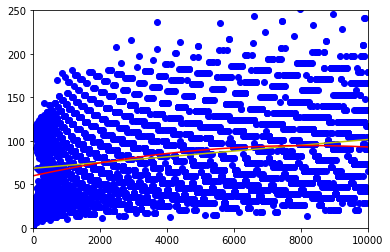

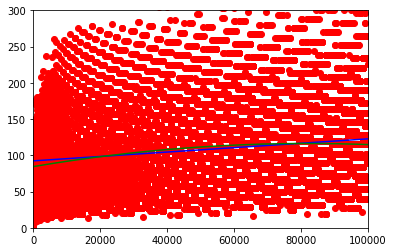

Yes they look like they converge on large intervals


In [75]:
## Problem 3

import matplotlib.pyplot as plt
%matplotlib inline
#List 
L = []

#fct f takes inputs of n and count
def f(n,count):
    if n == 1:
        L.append(count)
        #print(count)
        return
    if n % 2 == 0:
        n = n/2
        count += 1
    else:
        n = 3*n + 1
        count += 1
    f(n,count)
       
# run and fill L list with values        
for k in range(1,10000):
    f(k+1,0)

#set domain and range
xmin,xmax = xlim(0 , 10000)
ymin,ymax = ylim(0,250)
x = [i for i in range(1,10000)]
y = [L[i] for i in range(0,len(L))]

#Scatter Graph of all x vs y values
plt.plot(x,y, 'bo')

#Linear Least square fit on plot above
G = []
y2 = []
G.append(np.polyfit(x,y,1)[0])
G.append(np.polyfit(x,y,1)[1])
for j in range(1,10000):
    y2.append(G[0]*j+G[1])
plt.plot(x,y2,'y')

#Quadratic Least squares fit on plot above
G = []
y3 = []
G.append(np.polyfit(x,y,2)[0])
G.append(np.polyfit(x,y,2)[1])
G.append(np.polyfit(x,y,2)[2])
for j in range(1,10000):
    y3.append(G[0]*j**2 + G[1]*j + G[2])
plt.plot(x,y3,'r')
plt.show()
##########################################################

#List 
M = []

#fct f takes inputs of n and count
def g(n,count):
    if n == 1:
        M.append(count)
        #print(count)
        return
    if n % 2 == 0:
        n = n/2
        count += 1
    else:
        n = 3*n + 1
        count += 1
    g(n,count)
       
# run and fill L list with values        
for k in range(1,100000):
    g(k+1,0)

#set domain and range
xmin,xmax = xlim(0 , 100000)
ymin,ymax = ylim(0,300)
x = [i for i in range(1,100000)]
y = [M[i] for i in range(0,99999)]

#Scatter Graph of all x vs y values
plt.plot(x,y, 'ro')

#Linear Least square fit on plot above
H = []
y2 = []
H.append(np.polyfit(x,y,1)[0])
H.append(np.polyfit(x,y,1)[1])
for j in range(1,100000):
    y2.append(H[0]*j+H[1])
plt.plot(x,y2,'b')

#Quadratic Least squares fit on plot above
K = []
y3 = []
K.append(np.polyfit(x,y,2)[0])
K.append(np.polyfit(x,y,2)[1])
K.append(np.polyfit(x,y,2)[2])
for j in range(1,100000):
    y3.append(K[0]*j**2 + K[1]*j + K[2])
plt.plot(x,y3,'g')
plt.show()
print("Yes they look like they converge on large intervals")